## Web Crawl
-- Crawl popular web forums and news outlets.
-- Collect data from pages.
-- Clean to fead to the sentiment anlysis and visualization.

In [ ]:
# import requests
# from bs4 import BeautifulSoup

# def get_headlines():
#     # turn this into a list/structure in the future
#     # replace with api calls for longevity?
#     url = "https://www.bbc.com/news"
#     response = requests.get(url)
#     soup = BeautifulSoup(response.text, "html.parser")

#     #scrape h2 and h3 
#     h2Headlines = [h.get_text() for h in soup.find_all("h2")]
#     h3Headlines = [h.get_text() for h in soup.find_all("h3")]

#     #add to one list
#     headlines = h2Headlines + h3Headlines
#     return headlines

# print(get_headlines())

import requests
from bs4 import BeautifulSoup

def get_headlines(urls):
    all_headlines = []
    for url in urls:
        try:
            response = requests.get(url)
            response.raise_for_status()  # Raise error for bad responses
            soup = BeautifulSoup(response.text, "html.parser")

            h2Headlines = [h.get_text().strip() for h in soup.find_all("h2")]
            h3Headlines = [h.get_text().strip() for h in soup.find_all("h3")]

            headlines = h2Headlines + h3Headlines
            all_headlines.extend(headlines)
        except requests.RequestException as e:
            print(f"Failed to get headlines from {url}: {e}")

    return all_headlines

# Example usage
urls = [
    "https://www.bbc.com/news",
    "https://www.nytimes.com",
]
# "https://www.cnn.com",
#     "https://www.nytimes.com",
#     "https://www.foxnews.com",
#     "https://www.nbcnews.com",
#     "https://www.washingtonpost.com",
#     "https://www.cbsnews.com",
#     "https://www.economist.com",

print(get_headlines(urls))


['Nine reported killed in Russian strike on civilian bus in Ukraine', 'Ukraine and Russia far apart in direct talks, but prisoner swap agreed', 'Dizziness from hunger has become a constant, Gazans tell the BBC', "How Diddy's lawyers used freak-off texts against Cassie", 'US loses last perfect credit rating amid rising debt', 'Ukraine and Russia far apart in direct talks, but prisoner swap agreed', "Why Sean Diddy Combs's trial hinges on ex-girlfriend Cassie's testimony", 'Ex-FBI boss interviewed by Secret Service over Trump seashell post', "Trump's frantic week of peace brokering hints at what he really wants", 'Dizziness from hunger has become a constant, Gazans tell the BBC', "I was on a flight - but British Airways told me I wasn't", "Four obstacles for Republican rebels in Trump's 'big, beautiful' tax bill", "Venezuelan deported from US using gang 'points system', lawyers say", 'Melania Trump statue goes missing in Slovenia', "'To Easy LoL' - New Orleans jail break may have been in

## sentiment analysis

In [2]:
from textblob import TextBlob

def stringsToText(list):
    result = ", ".join(list)
    return result


def analyze_sentiment(text):
    return TextBlob(text).sentiment.polarity

text = stringsToText(get_headlines(urls))

#TextBlob(text).sentiment.polarity returns a sentiment polarity score, which is a number between -1.0 and 1.0 that tells you how positive or negative the text is.
# -1 = negative ; 1 = positive
sentiment = analyze_sentiment(text)

print(sentiment)

0.21507561702366898


## Color visualizations

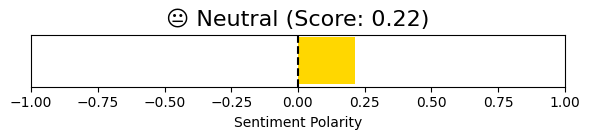

In [3]:
import matplotlib.pyplot as plt

def get_mood_color(score):
    if score > 0.3:
        return "limegreen", "😊 Happy"
    elif score < -0.3:
        return "red", "😠 Angry"
    else:
        return "gold", "😐 Neutral"

def show_sentiment_bar(score):
    color, label = get_mood_color(score)
    fig, ax = plt.subplots(figsize=(6, 1.5))
    ax.barh(0, score, color=color)
    ax.set_xlim(-1, 1)
    ax.set_title(f"{label} (Score: {score:.2f})", fontsize=16)
    ax.set_yticks([])
    ax.axvline(0, color='black', linestyle='--')
    plt.xlabel("Sentiment Polarity")
    plt.tight_layout()
    plt.show()


show_sentiment_bar(sentiment)


In [4]:
import csv
from datetime import datetime


# Calculate label
label = get_mood_color(sentiment)[1]
#print(label)

#  Define the timestamp
timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# print(f"Timestamp: {timestamp}")
# print(f"Sentiment: {sentiment}")
# print(f"Label: {label}")


#  Append to CSV file
with open("mood_history.csv", "a", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow([timestamp, sentiment, label])


In [ ]:
import schedule
import time

def job():
    headlines = get_headlines()
    text = stringsToText(headlines)
    score = analyze_sentiment(text)
    label = get_mood_color(score)[1]
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    with open("mood_history.csv", "a", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow([timestamp, score, label])
    show_sentiment_bar(score)


schedule.every(10).minutes.do(job)

while True:
    schedule.run_pending()
    time.sleep(1)
